# PREDICTING INCOME

# Supervised Learning

In [1]:
# Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import os
import warnings
warnings.filterwarnings('ignore')

### User Define Functions

In [2]:
# Create Data audit Report for continuous variables
def cont_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                      x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                      x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1',
                              'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [3]:
# Create Data audit Report for categorical variables
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()

    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                      round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                     index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [4]:
def continuous_summary(x):
    return pd.Series([x.mean(), x.median(), x.std(), x.var()], 
                     index = ['MEAN','MEDIAN', 'STD', 'VARIANCE'])

### Data Loading and Inspection

#### Data Attributes:

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15. salary >50K or <50K

In [5]:
data = pd.read_csv(r'C:\Users\nidhi\AML_1104_2_LABs\adult.data.csv', na_values = '?')
data.head(5)

,age,workclass,fnlwgt,education,edu-num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# setting column names
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
data.head(5)

,age,workclass,fnlwgt,education,edu-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# gives result for numerical data only
data.describe(include='all')

,age,workclass,fnlwgt,education,edu-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# For continuous data
data.select_dtypes(include='int64').apply(cont_summary)

,age,fnlwgt,edu-num,capital_gain,capital_loss,hours_per_week
N,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04
NMISS,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
SUM,1.256257e+06,6.179373e+09,328237.000000,3.508932e+07,2.842700e+06,1.316684e+06
MEAN,3.858165e+01,1.897784e+05,10.080679,1.077649e+03,8.730383e+01,4.043746e+01
MEDIAN,3.700000e+01,1.783560e+05,10.000000,0.000000e+00,0.000000e+00,4.000000e+01
STD,1.364043e+01,1.055500e+05,2.572720,7.385292e+03,4.029602e+02,1.234743e+01
VAR,1.860614e+02,1.114080e+10,6.618890,5.454254e+07,1.623769e+05,1.524590e+02
MIN,1.700000e+01,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000e+00
P1,1.700000e+01,2.718580e+04,3.000000,0.000000e+00,0.000000e+00,8.000000e+00
P5,1.900000e+01,3.946000e+04,5.000000,0.000000e+00,0.000000e+00,1.800000e+01


In [10]:
# For categorical data
data.select_dtypes(include='object').apply(cat_summary)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
N,30725,32561,32561,30718,32561,32561,32561,31978,32561
NMISS,1836,0,0,1843,0,0,0,583,0
MODE,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
FREQ,22696,10501,14976,4140,13193,27816,21790,29170,24720
PERCENT,73.87,32.25,45.99,13.48,40.52,85.43,66.92,91.22,75.92


In [11]:
# Null values in data
print(data.shape)
print(data.isnull().sum())

(32561, 15)
age                  0
workclass         1836
fnlwgt               0
education            0
edu-num              0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
salary               0
dtype: int64


In [12]:
# 13 percent of the data is missing 
percent_missing = data.isnull().sum() * 100 / len(data)
print(round(percent_missing,2))
print('Missing percentage of the data is:', 5.64+5.66+1.79)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
edu-num           0.00
marital_status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital_gain      0.00
capital_loss      0.00
hours_per_week    0.00
native_country    1.79
salary            0.00
dtype: float64
Missing percentage of the data is: 13.09


### Data Preprocessing

In [13]:
# saving a copy of original data file
df = data.copy()

In [14]:
df.dropna(subset=['native_country'], inplace=True)

In [15]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
edu-num           0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [17]:
# Checking number of zeros
df.isin([0]).sum()

age                   0
workclass             0
fnlwgt                0
education             0
edu-num               0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain      29320
capital_loss      30495
hours_per_week        0
native_country        0
salary                0
dtype: int64

In [18]:
# zeros in columns
percent_zeros = df.isin([0]).sum() * 100 / len(df)
print(round(percent_zeros,2))

age                0.00
workclass          0.00
fnlwgt             0.00
education          0.00
edu-num            0.00
marital_status     0.00
occupation         0.00
relationship       0.00
race               0.00
sex                0.00
capital_gain      91.69
capital_loss      95.36
hours_per_week     0.00
native_country     0.00
salary             0.00
dtype: float64


In [19]:
# check occuring values

#largest value is 99999 which is unlikely as other values are not near to it/can be a human error
df.capital_gain.value_counts(dropna=False).head(10) 

0        29320
15024      341
7688       275
7298       242
99999      152
3103        97
5178        95
5013        69
4386        68
8614        55
Name: capital_gain, dtype: int64

### Feature Selection and Pruning

In [20]:
# dropping columns with 91% and 95% zeros and errors
df.drop(['capital_gain', 'capital_loss'], axis = 1, inplace=True) 

In [21]:
df.shape

(31978, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       31978 non-null  object
 2   fnlwgt          31978 non-null  int64 
 3   education       31978 non-null  object
 4   edu-num         31978 non-null  int64 
 5   marital_status  31978 non-null  object
 6   occupation      31978 non-null  object
 7   relationship    31978 non-null  object
 8   race            31978 non-null  object
 9   sex             31978 non-null  object
 10  hours_per_week  31978 non-null  int64 
 11  native_country  31978 non-null  object
 12  salary          31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.4+ MB


### Converting categorical data to Numerical using Label Encoder

In [23]:
le = LabelEncoder() 

In [24]:
df['workclass']= le.fit_transform(df['workclass']) 
df['education']= le.fit_transform(df['education']) 
df['marital_status']= le.fit_transform(df['marital_status'])   
df['occupation']= le.fit_transform(df['occupation']) 
df['relationship']= le.fit_transform(df['relationship']) 
df['race']= le.fit_transform(df['race'])  
df['sex']= le.fit_transform(df['sex']) 
df['native_country']= le.fit_transform(df['native_country']) 
df['salary']= le.fit_transform(df['salary']) 

In [25]:
df.head(5)

,age,workclass,fnlwgt,education,edu-num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,6,77516,9,13,4,0,1,4,1,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,40,4,0


In [26]:
df.to_csv('cleaned_Numeric_adult-data.csv')

In [27]:
df.salary.value_counts()

0    24283
1     7695
Name: salary, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             31978 non-null  int64
 1   workclass       31978 non-null  int32
 2   fnlwgt          31978 non-null  int64
 3   education       31978 non-null  int32
 4   edu-num         31978 non-null  int64
 5   marital_status  31978 non-null  int32
 6   occupation      31978 non-null  int32
 7   relationship    31978 non-null  int32
 8   race            31978 non-null  int32
 9   sex             31978 non-null  int32
 10  hours_per_week  31978 non-null  int64
 11  native_country  31978 non-null  int32
 12  salary          31978 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.3 MB


## Data Visualization

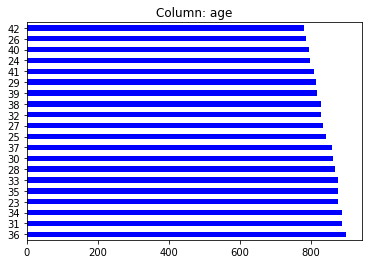

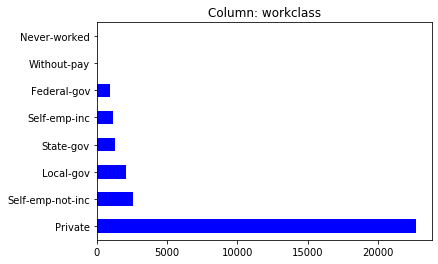

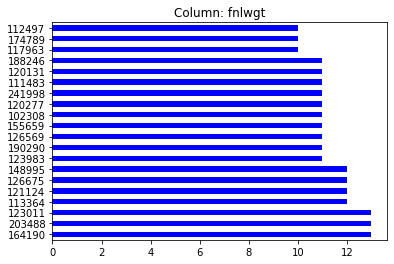

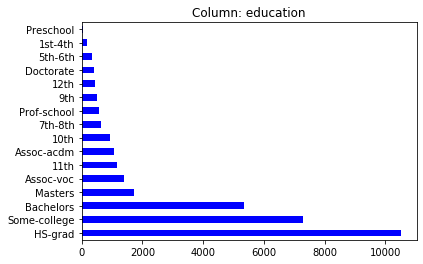

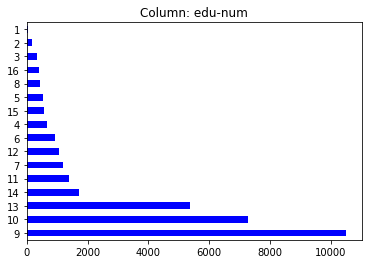

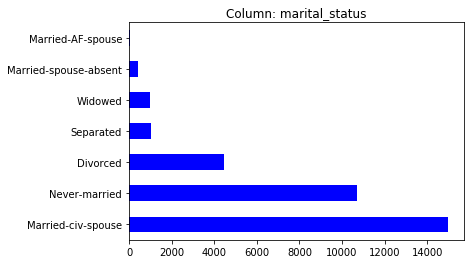

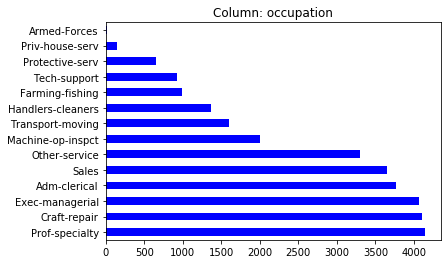

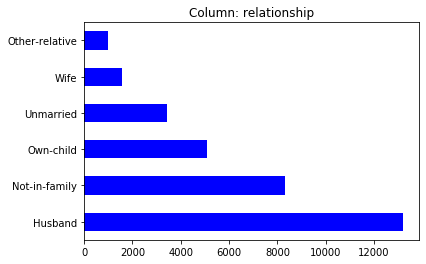

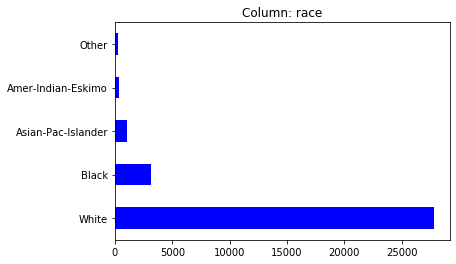

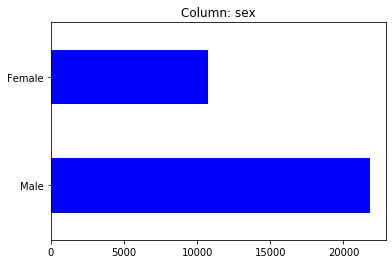

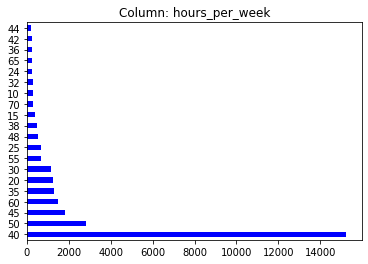

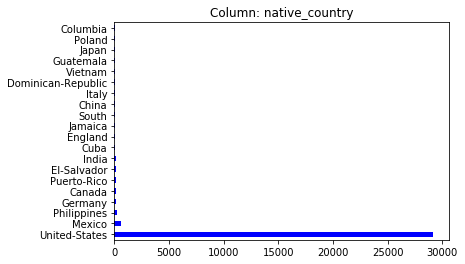

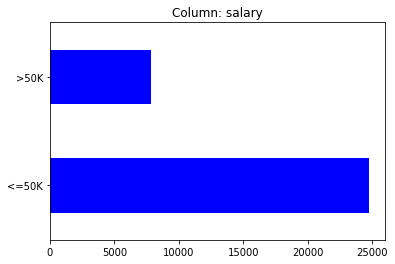

In [29]:
for colname in df:
    plt.title('Column: ' + colname)

    (data[colname]
         .value_counts()
         .head(20)
         .plot(kind='barh', color='b'))

    plt.show()

In [30]:
df.corr()

,age,workclass,fnlwgt,education,edu-num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
age,1.000000,0.040069,-0.076704,-0.009375,0.036614,-0.265736,0.002228,-0.264718,0.026615,0.089035,0.068299,-0.000323,0.233601
workclass,0.040069,1.000000,-0.024580,0.005492,0.003004,-0.019893,0.007707,-0.058477,0.050095,0.071219,0.042582,-0.001825,0.001736
fnlwgt,-0.076704,-0.024580,1.000000,-0.028538,-0.044256,0.028455,-0.000349,0.010490,-0.021784,0.025624,-0.018885,-0.063954,-0.009014
education,-0.009375,0.005492,-0.028538,1.000000,0.359094,-0.038663,-0.041766,-0.011239,0.014345,-0.027212,0.056381,0.077016,0.080056
edu-num,0.036614,0.003004,-0.044256,0.359094,1.000000,-0.068945,0.069393,-0.094473,0.035302,0.011326,0.149417,0.089206,0.335883
marital_status,-0.265736,-0.019893,0.028455,-0.038663,-0.068945,1.000000,0.035577,0.185034,-0.068888,-0.129334,-0.193249,-0.021846,-0.198467
occupation,0.002228,0.007707,-0.000349,-0.041766,0.069393,0.035577,1.000000,-0.038203,-0.003168,0.047865,-0.012956,-0.002652,0.035885
relationship,-0.264718,-0.058477,0.010490,-0.011239,-0.094473,0.185034,-0.038203,1.000000,-0.117787,-0.581323,-0.248907,-0.010668,-0.250866
race,0.026615,0.050095,-0.021784,0.014345,0.035302,-0.068888,-0.003168,-0.117787,1.000000,0.090093,0.045787,0.121527,0.072713
sex,0.089035,0.071219,0.025624,-0.027212,0.011326,-0.129334,0.047865,-0.581323,0.090093,1.000000,0.229645,0.001556,0.216070


In [31]:
corr = df.corr()

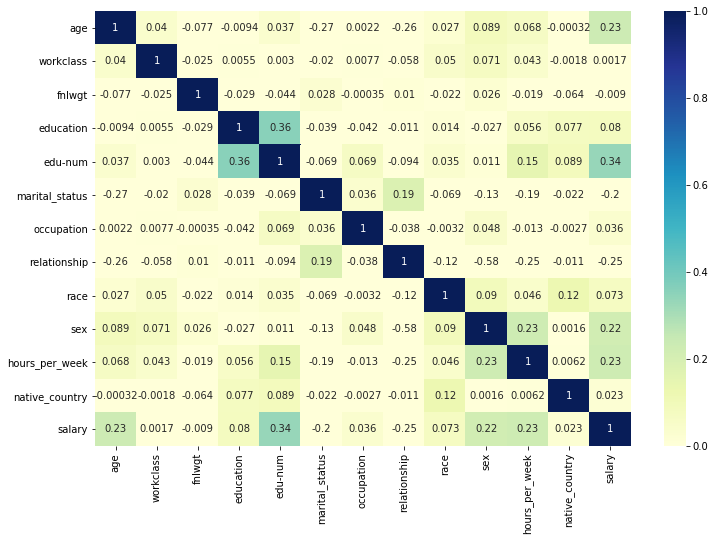

In [32]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin=0, vmax=1, annot = True, cmap="YlGnBu")

### Central tendency and Standard deviation 

In [33]:
df.select_dtypes(include='int64').apply(continuous_summary)

,age,fnlwgt,edu-num,hours_per_week
MEAN,38.579023,1.897141e+05,10.071236,40.417850
MEDIAN,37.000000,1.783120e+05,10.000000,40.000000
STD,13.662085,1.057255e+05,2.560667,12.345285
VARIANCE,186.652557,1.117789e+10,6.557017,152.406063


In [34]:
df.select_dtypes(include='int32').apply(continuous_summary)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
MEAN,3.093658,10.302489,2.609575,6.132497,1.447276,3.674120,0.668272,36.388298,0.240634
MEDIAN,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
STD,1.108416,3.873960,1.508589,3.976223,1.606442,0.839740,0.470841,6.107197,0.427475
VARIANCE,1.228586,15.007569,2.275840,15.810351,2.580655,0.705163,0.221691,37.297855,0.182735


## Random Sampler

In [35]:
ros = RandomOverSampler(random_state=99)
X, y = ros.fit_resample(df.drop(['salary'], axis=1), df.salary)

In [36]:
len(X), len(y)

(48566, 48566)

## Train and Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33996, 12) (14570, 12) (33996,) (14570,)


## Modelling- Random Forest

In [39]:
rfc=RandomForestClassifier(random_state=42)

In [40]:
# Model fit
rfc.fit(X_train,y_train.values.ravel())
y_pred = rfc.predict(X_test)

In [41]:
print(rfc.score(X_test,y_test))
print(classification_report(y_test, y_pred))

0.9105010295126973
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7277
           1       0.87      0.97      0.92      7293

    accuracy                           0.91     14570
   macro avg       0.92      0.91      0.91     14570
weighted avg       0.92      0.91      0.91     14570



In [42]:
print(confusion_matrix(y_test, y_pred)) 

[[6226 1051]
 [ 253 7040]]


In [43]:
print('Train Accuracy:', accuracy_score(y_train, rfc.predict(X_train)).round(4) * 100)
print('Test Accuracy:', accuracy_score(y_test, y_pred).round(4) * 100)

Train Accuracy: 99.99
Test Accuracy: 91.05


### Using GridSearch CV for tuning Hyperparamerters

In [67]:
hyperparameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}


In [70]:
clf = GridSearchCV(rfc, hyperparameters, cv=5)

In [71]:
clf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [72]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [73]:
clf.best_score_

0.8160959872991704

In [74]:
print("Training accuracy:", accuracy_score(y_train.values.ravel(), clf.best_estimator_.predict(X_train)).round(4) * 100)
print("Testing accuracy:", accuracy_score(y_test, clf.best_estimator_.predict(X_test)).round(4) * 100)

Training accuracy: 82.39999999999999
Testing accuracy: 81.89


### Parameters After Tuning

In [75]:
rfc=RandomForestClassifier(random_state=42, n_estimators=500, max_depth=8, max_features='auto', criterion='gini')

In [76]:
rfc.fit(X_train,y_train.values.ravel())
y_pred_cv = rfc.predict(X_test)

In [77]:
print(rfc.score(X_test,y_test))
print(classification_report(y_test, y_pred_cv))

0.8189430336307482
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7277
           1       0.78      0.88      0.83      7293

    accuracy                           0.82     14570
   macro avg       0.82      0.82      0.82     14570
weighted avg       0.82      0.82      0.82     14570



In [78]:
print(confusion_matrix(y_test, y_pred_cv)) 

[[5495 1782]
 [ 856 6437]]


In [79]:
print('Train Accuracy:', accuracy_score(y_train, rfc.predict(X_train)).round(4) * 100)
print('Test Accuracy:', accuracy_score(y_test, y_pred_cv).round(4) * 100)

Train Accuracy: 82.39999999999999
Test Accuracy: 81.89


# Unsupervised Learning

In [ ]:
# Required library import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

### Reading Data

In [190]:
df = pd.read_csv(r'C:\Users\nidhi\AML_1104_2_LABs\cleaned_Numeric_adult-data.csv')
df.head(5)

,age,workclass,fnlwgt,education,edu-num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,40,4,0


## Normalizing Data

In [192]:
scaler = StandardScaler() 

In [193]:
df_scaled = StandardScaler().fit_transform(df)

## Principle Component Analysis 

In [195]:
pca = PCA(n_components=df_scaled.shape[1])
pca.fit(df_scaled)

PCA(n_components=13)

In [196]:
pca.explained_variance_

array([2.30374697, 1.43026181, 1.14805508, 1.11952183, 1.01869048,
       0.98309565, 0.94206219, 0.85087583, 0.83510627, 0.78984082,
       0.66989664, 0.53015497, 0.37912249])

In [197]:
sum(pca.explained_variance_)

13.000431020191632

In [198]:
pca.explained_variance_ratio_

array([0.17720543, 0.11001649, 0.088309  , 0.08611421, 0.07835821,
       0.07562024, 0.07246392, 0.06544982, 0.06423681, 0.06075497,
       0.0515288 , 0.0407798 , 0.0291623 ])

In [199]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

array([ 17.721,  28.723,  37.554,  46.165,  54.001,  61.563,  68.809,
        75.354,  81.778,  87.853,  93.006,  97.084, 100.   ])

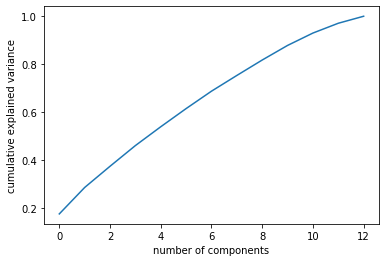

In [200]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [201]:
pca_final = PCA(n_components=9)
pca_final.fit(df_scaled)

PCA(n_components=9)

In [202]:
pca_final.explained_variance_

array([2.30374697, 1.43026181, 1.14805508, 1.11952183, 1.01869048,
       0.98309565, 0.94206219, 0.85087583, 0.83510627])

In [203]:
dimensions = pd.DataFrame(pca_final.fit_transform(df_scaled), columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])

In [204]:
dimensions.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.462790,-0.194086,-0.504512,-1.456253,-0.968796,2.897958,-0.510716,0.106620,-0.368293
1,0.557754,0.051422,-1.199835,-1.138730,-1.099792,1.389478,0.139367,-0.607305,-2.130708
2,0.591313,0.578397,-0.607083,-0.353798,0.787352,-0.122224,0.278813,-0.257359,0.339739
3,-0.050829,2.803607,-0.789181,0.960751,-0.191901,-0.496414,-0.391688,-1.936438,0.348291
4,-2.453430,-0.028365,0.945545,5.143972,-0.871693,0.802648,0.908270,2.486500,0.424501
5,-1.431791,-2.150122,-0.579336,0.341936,0.892530,0.100373,1.269283,0.385570,0.642128
6,-2.366004,2.090560,-1.134823,2.372418,-1.264672,-0.138960,-0.280522,-0.190259,-1.525194
7,2.102470,0.439887,-0.809795,-0.269919,-0.118187,1.398684,0.730519,-0.274930,-0.375007
8,0.665161,-2.216553,0.528765,-0.130778,-0.990570,-0.810428,-0.629593,1.085106,0.181532
9,1.853548,-0.351194,-0.133071,-0.039610,0.537410,-0.336945,-0.171948,0.170847,-0.723338


In [205]:
loadings = pd.DataFrame((pca_final.components_.T * np.sqrt(pca_final.explained_variance_)).T, columns=df.columns).T
loadings.columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9']

In [206]:
loadings.to_excel('Factor Loadings_Adult.xlsx')

In [207]:
# Selecting list variables from PCA based on Factor Loadings
pca_vars = ['workclass', 'fnlwgt', 'edu-num', 'race', 'sex', 'hours_per_week', 'salary']

In [208]:
df_pca = pd.DataFrame(df_scaled, columns=df.columns)[pca_vars]

In [209]:
df_pca.head(10)

,workclass,fnlwgt,edu-num,race,sex,hours_per_week,salary
0,2.936000,-1.062722,1.128918,0.385048,0.692806,-0.077734,-0.575691
1,1.887682,-1.007871,1.128918,0.385048,0.692806,-2.331531,-0.575691
2,-0.208955,0.244693,-0.439738,0.385048,0.692806,-0.077734,-0.575691
3,-0.208955,0.425240,-1.224066,-2.011035,0.692806,-0.077734,-0.575691
4,-0.208955,1.406658,1.128918,-2.011035,-1.443405,-0.077734,-0.575691
5,-0.208955,0.897180,1.521083,0.385048,-1.443405,-0.077734,-0.575691
6,-0.208955,-0.280232,-2.008395,-2.011035,-1.443405,-2.081109,-0.575691
7,1.887682,0.187865,-0.439738,0.385048,0.692806,0.339636,1.737042
8,-0.208955,-1.363097,1.521083,0.385048,-1.443405,0.757005,1.737042
9,-0.208955,-0.287217,1.128918,0.385048,0.692806,-0.077734,1.737042


## K- Means

In [211]:
km_2 = KMeans(n_clusters=2, random_state=17).fit(df_pca)
km_3 = KMeans(n_clusters=3, random_state=17).fit(df_pca)
km_4 = KMeans(n_clusters=4, random_state=17).fit(df_pca)
km_5 = KMeans(n_clusters=5, random_state=17).fit(df_pca)
km_6 = KMeans(n_clusters=6, random_state=17).fit(df_pca)
km_7 = KMeans(n_clusters=7, random_state=17).fit(df_pca)
km_8 = KMeans(n_clusters=8, random_state=17).fit(df_pca)
km_9 = KMeans(n_clusters=9, random_state=17).fit(df_pca)
km_10 = KMeans(n_clusters=10, random_state=17).fit(df_pca)

In [212]:
df['CLUSTER_2'] = km_2.labels_
df['CLUSTER_3'] = km_3.labels_
df['CLUSTER_4'] = km_4.labels_
df['CLUSTER_5'] = km_5.labels_
df['CLUSTER_6'] = km_6.labels_
df['CLUSTER_7'] = km_7.labels_
df['CLUSTER_8'] = km_8.labels_
df['CLUSTER_9'] = km_9.labels_

In [213]:
df_pca.head(10)

,workclass,fnlwgt,edu-num,race,sex,hours_per_week,salary
0,2.936000,-1.062722,1.128918,0.385048,0.692806,-0.077734,-0.575691
1,1.887682,-1.007871,1.128918,0.385048,0.692806,-2.331531,-0.575691
2,-0.208955,0.244693,-0.439738,0.385048,0.692806,-0.077734,-0.575691
3,-0.208955,0.425240,-1.224066,-2.011035,0.692806,-0.077734,-0.575691
4,-0.208955,1.406658,1.128918,-2.011035,-1.443405,-0.077734,-0.575691
5,-0.208955,0.897180,1.521083,0.385048,-1.443405,-0.077734,-0.575691
6,-0.208955,-0.280232,-2.008395,-2.011035,-1.443405,-2.081109,-0.575691
7,1.887682,0.187865,-0.439738,0.385048,0.692806,0.339636,1.737042
8,-0.208955,-1.363097,1.521083,0.385048,-1.443405,0.757005,1.737042
9,-0.208955,-0.287217,1.128918,0.385048,0.692806,-0.077734,1.737042


In [214]:
print(pd.Series(km_2.labels_).value_counts()/sum(pd.Series(km_2.labels_).value_counts()), '\n')
print(pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts()), '\n')
print(pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts()), '\n')
print(pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts()), '\n')
print(pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts()), '\n')
print(pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts()), '\n')
print(pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts()), '\n')
print(pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts()), '\n')

0    0.748226
1    0.251774
dtype: float64 

2    0.463398
1    0.291559
0    0.245043
dtype: float64 

1    0.407732
2    0.236025
3    0.227803
0    0.128440
dtype: float64 

4    0.344672
2    0.218421
1    0.197301
0    0.122074
3    0.117532
dtype: float64 

0    0.285989
1    0.207778
2    0.192394
5    0.115377
3    0.114349
4    0.084112
dtype: float64 

3    0.248956
6    0.200020
2    0.189112
0    0.113620
1    0.107917
5    0.071912
4    0.068464
dtype: float64 

3    0.233473
1    0.189178
5    0.157019
6    0.112459
7    0.103640
2    0.075492
0    0.067137
4    0.061601
dtype: float64 

3    0.232710
1    0.186095
5    0.156952
7    0.102380
2    0.075028
0    0.065480
6    0.064253
4    0.061203
8    0.055898
dtype: float64 



## Elbow Analysis

In [219]:
# Calculating the values of the Distortion and Inertia
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
k_range = range(2, 11) 

for k in k_range: 
    km = KMeans(n_clusters=k)
    km.fit(df_pca) 
    
    distortions.append(sum(np.min(cdist(df_pca, km.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0]) 
    inertias.append(km.inertia_) 

    mapping1[k] = sum(np.min(cdist(df_pca, km.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0] 
    mapping2[k] = km.inertia_ 

In [220]:
for key, val in mapping1.items(): 
    print(str(key) + ':', val)

2: 2.213990096919231
3: 1.9748740038971824
4: 1.8282171926661404
5: 1.7321578885590323
6: 1.673728619078618
7: 1.6341149471844285
8: 1.602547651066448
9: 1.5615717204863306
10: 1.5236588825587785


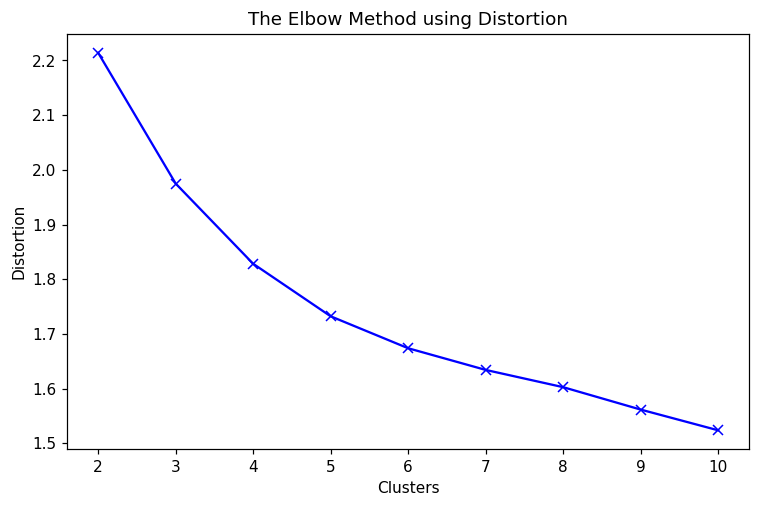

In [221]:
plt.figure(figsize=(8,5), dpi=110)
plt.plot(k_range, distortions, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [222]:
for key, val in mapping2.items(): 
    print(str(key) + ':', val) 

2: 174329.1671266226
3: 148520.24618007054
4: 128275.84604440634
5: 115163.58151550237
6: 107132.47752706731
7: 101242.26673326752
8: 95910.98928273076
9: 92794.39298825414
10: 88645.03822120927


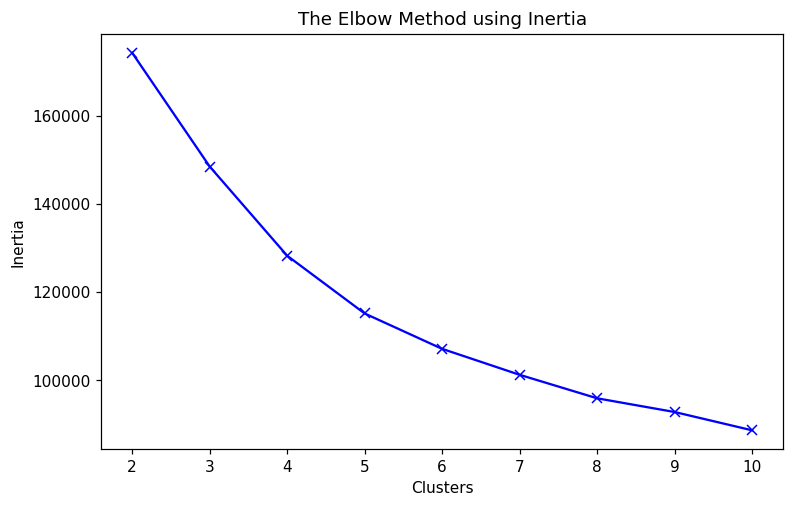

In [223]:
plt.figure(figsize=(8,5), dpi=110)
plt.plot(k_range, inertias, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 